# EDA

hello , this is a notebook for analysing the results.csv

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('results.csv')

df

Matplotlib is building the font cache; this may take a moment.


,id_test,function_name,array_length,comparison,time,space
0,0,sequential_search,1000,1000,0.213390,0.003906
1,0,advanced_sequential_search,1000,830,0.202144,0.000000
2,0,binary_search,1000,10,0.202496,0.000000
3,1,sequential_search,11000,11000,0.206543,0.000000
4,1,advanced_sequential_search,11000,6357,0.204019,0.000000
...,...,...,...,...,...,...
592,197,advanced_sequential_search,991000,554325,0.321604,0.000000
593,197,binary_search,991000,20,0.202194,0.000000
594,198,sequential_search,991000,1605,0.203542,0.000000
595,198,advanced_sequential_search,991000,1605,0.204256,0.000000


In [3]:
group_columns = ['function_name', 'array_length']
cal_columns = ['comparison', 'time','space']


In [4]:
group_df = df.groupby(group_columns,as_index=False).mean()

In [5]:
calculated_results = group_df[group_columns+cal_columns]

calculated_results

,function_name,array_length,comparison,time,space
0,advanced_sequential_search,1000,830.0,0.202144,0.0
1,advanced_sequential_search,11000,6583.0,0.203883,0.0
2,advanced_sequential_search,21000,10163.0,0.206371,0.0
3,advanced_sequential_search,31000,9799.0,0.205318,0.0
4,advanced_sequential_search,41000,29471.0,0.218945,0.0
...,...,...,...,...,...
295,sequential_search,951000,479463.0,0.321123,0.0
296,sequential_search,961000,961000.0,0.227685,0.0
297,sequential_search,971000,971000.0,0.393626,0.0
298,sequential_search,981000,981000.0,0.355908,0.0


In [6]:
function_names = list(calculated_results['function_name'].unique())
function_names

['advanced_sequential_search', 'binary_search', 'sequential_search']

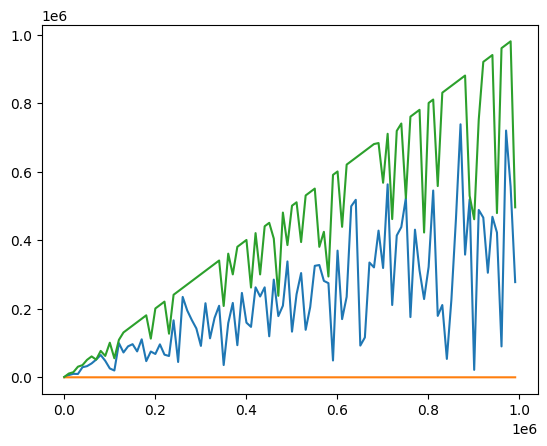

In [7]:
for function_name in function_names:
    df_plot = calculated_results[calculated_results['function_name'] == function_name]
    plt.plot(df_plot['array_length'], df_plot['comparison'],label=function_name)



In [8]:
calculated_results[calculated_results['function_name'] == 'binary_search']['comparison'].describe()

count    100.000000
mean      18.280000
std        1.647343
min       10.000000
25%       18.000000
50%       18.500000
75%       19.500000
max       20.000000
Name: comparison, dtype: float64

In [9]:
df_plot = calculated_results[calculated_results['function_name'] == 'binary_search']

In [10]:
from complexity import get_complexity

x_plot = df_plot['array_length']
y_plot = df_plot['comparison'] 

get_complexity(x_plot,y_plot)


'O(log2)'